# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [309]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels is a Python module that provides classes and functions for the
# estimation of many different statistical models, as well as for conducting
# statistical tests, and statistical data exploration.
# Import libraries for building linear regression model
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm

# import Ordinary least squares Linear Regression library
from sklearn.linear_model import LinearRegression
# Import to Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
# Import library for data preprocessing, transforming features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
# Import library for cross-validation
from sklearn.model_selection import  cross_val_score
# import Mean squared error regression loss library
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#imports sklearn Utilities to load popular datasets and artificial data generators.
from sklearn import datasets


import warnings
warnings.filterwarnings("ignore")

## data access and collection

In [313]:
# read the data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/MIT/elective/Boston.csv") ## Complete the code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## data preparation

In [314]:
# returns the first 5 rows
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [315]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 506
Number of columns: 13


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [317]:
summary_stats = df.describe(include="all")
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std    

##Observations##

The dataset has 506 rows which each correspond to a house in a Boston suburb.
there are no null values.

### Features/predictors ###

**CRIM: Per capita crime rate by town**, means the average rate of crimes committed per resident per given time frame. The mean of 3.61 is right-skewed as the median shows that half the towns have a crime rate of 0.25 or less. The maximum crime rate of 88.97 is much higher than the minimum of 0.00632, contributing to a high variance of 8.60 and a right-skewed distribution.


**ZN: Proportion of residential land zoned for lots over 25,000 sq.ft** : a majority of towns have no large lot zoning as the median is 0. Upper quartile towns have up to 12.5 % land that is zoned for large plots. a few towns are fully zoned for large plots (max 100%).

**INDUS: Proportion of non-retail business acres per town.** The average of 11.14% vs median of 9.69% suggest a central tendency near 10%, so many towns have a moderate non retail business acreage. But the range, from a maximum of 27.7 % and a minimum of 0.46% shows that some towns are predominantly residential while others have significant industrial or non-retail business presence.

**CHAS: Charles River dummy variable** (= 1 if tract bounds river; 0 otherwise)
This is a boolean variable to indicate that a house is in a town bordering the Charles river in Boston. we see that only 6.92% of towns border the river and that 93.08 don't bound the Charles river. So we can conclude that the 7% have probably higher property values as river bound areas tend to be more expensive.


**NOX: Nitric Oxide concentration (parts per 10 million)**. air pollution  serves as a quality indicator for each town of and an indirect marker of industrialization and urbanization. The values range between 0.385 (cleaner, less industrialized), and 0.871 (poor air quality) with a median of 0.538 and average of 0.55 and a standard deviation of 0.1159 indicating a slight right skewness indicating environmental inequality. we expect NOX to correlate with industrial activity and inversely with property values, public health and environmental quality.


AGE: Proportion of owner-occupied units built before 1940.
on average 68.87 % of houses are built before 1940, but in half the towns, 77.5 % are older than 1940. this left-skewedness means that some towns have an almost exclusively pre 1940 housing stock. there is high diversity in the housing age as the deviation is 28% with a min. of 2.9% and a max of 100%.

**RM: average Number of Rooms per house** On average the # of rooms centers around 6.28 very close to median value of 6.21 so the distribution is almost symmetric. the 0.70 standard deviation is moderate relative to the range between the minimum of 3.561 and max value of 8.78).

**DIS: Weighted distances to five Boston employment centers** : houses have a very wide range of employment center distance, between 1.12 and 12.12 miles. the average is 3.8 miles with a median of 3.21 indicating a slight right skewedness. Low DIS corresponds to urban areas while high DIS means a low density or rural suburb.


**RAD: Index of accessibility to radial highways** There is significant variability in highway access across towns ranging from median 5 to 24 miles with most towns clustering at mid range accesability level.

**TAX: Full-value property-tax rate per 10,000 dollars** property tax ranges from 1.87% to 7.11% with average of 4.08%. there is some variability as the highest 25% pay more than 6.66% and the lowest 25% pay 2.79%.

**PTRATIO: Pupil-teacher ratio by town** this is the number of students who attend a school or university divided by the number of teachers in the institution. the mean is 18.46 with a maximum of 22.0 and standard deviation of 2.16 indicating low to moderate variability. 25% of towns have a ratio < 17.4 while upper quartile towns have higher ratios.

**LSTAT: % lower status of the population** the LSTAT shows a wide range between 1.73% and 37.97% and a mean of 12.65% with standard deviation of 7.14%. 25% of towns have a percentage of lower-status populations below 6.95% while the upper quartile is 16.95%.

### target variable ###
MEDV: Median value of owner-occupied homes in 1000 dollars (1970 values)
house value has a wide range from \$5000 to \$50000 with median of \$21200 and mean of \$22533. the \$50k max value indicates this dataset was capped to reduce outliers.



##Sanity checks##



In [318]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


There are no null values.
However we detected that the MEDV target variable is capped at \$50000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

Questions:

1.  What does the distribution of 'MEDV' look like?  
2.  What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3.  What are all the inferences that can be found by doing univariate analysis for different variables?
4.  Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

--> see answers below

## Univariate Analysis##

In [319]:
## define a function for boxplots and histograms for numerical variables
## continuous variables : CRIM. ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, LSTAT and MEDV
def histogram_boxplot(feature, title, figsize=(10, 6), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_plot, ax_hist) = plt.subplots(
      nrows=2,  # Number of rows of the subplot grid
      sharex=True,  # The X-axis will be shared
      gridspec_kw={"height_ratios": (.25, .75)},
      figsize=figsize
    )

    ax1 = sns.boxplot(x=feature, ax=ax_plot, showmeans=True, color='red')
    ax1.set_title(f'Box Plot of {title}')
    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol

    # For histogram
    ax2 = sns.histplot(x=feature, kde=True, ax=ax_hist, bins=bins)
    ax2.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.ylabel('Frequency') # y axis name
    ax2.set_title(f'Histogram of {title}')
    plt.show()



In [320]:
#define a function for countplots on categorical data
## 	Categorical Variables: CHAS and RAD
def bar_perc(data, z, title):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert ratings column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='viridis')
    ax.set_title(f'count Plot of {title}')

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

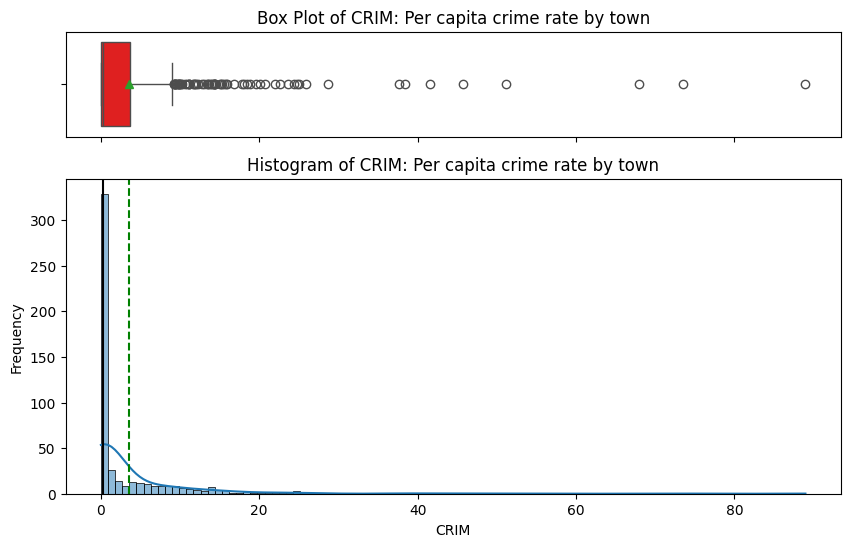

In [321]:
histogram_boxplot(df.CRIM, 'CRIM: Per capita crime rate by town')

CRIM: Per capita crime rate by town, means the average rate of crimes committed per resident per given time frame. The mean of 3.61 is right-skewed as the median shows that half the towns have a crime rate of 0.25 or less. The maximum crime rate of 88.97 is much higher than the minimum of 0.00632, contributing to a high variance of 8.60 and a right-skewed distribution.

from the histogram we see that the majority of towns have very low crime rates as seen by sharp peak near minimum of 0.00632, but there is a long right tail, so some towns have a much higher crime rate.

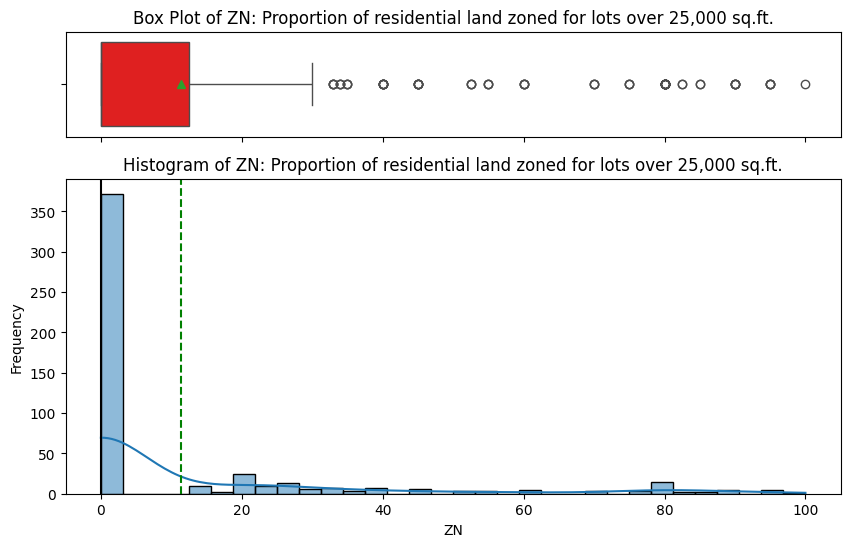

In [322]:
histogram_boxplot(df.ZN, 'ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.')


a majority of towns have no large lot zoning as the median is 0. Upper quartile towns have up to 12.5 % land that is zoned for large plots. a few towns are fully zoned for large plots (max 100%). we can deduce that the lower ZN the more urbanised, the higher the more suburban.

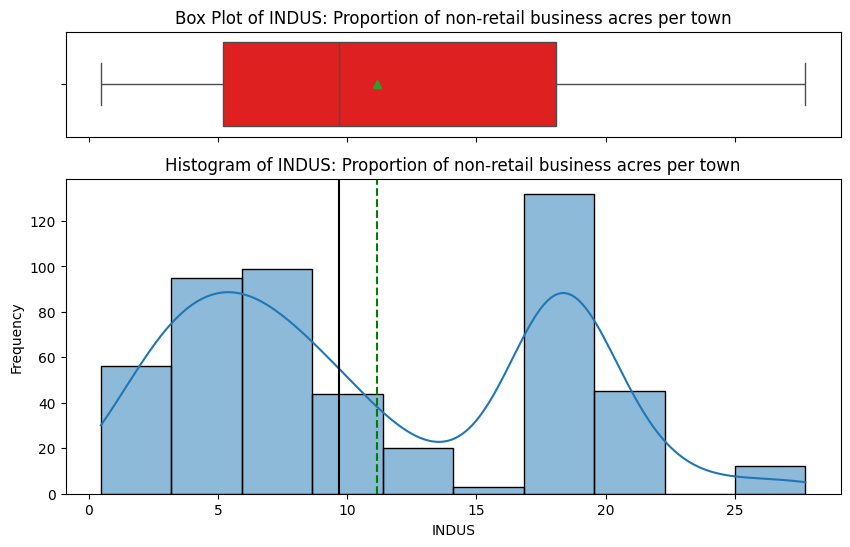

In [323]:
histogram_boxplot(df.INDUS, 'INDUS: Proportion of non-retail business acres per town')


The average of 11.14% vs median of 9.69% suggest a central tendency near 10%, so many towns have a moderate non retail business acreage. But the range, from a maximum of 27.7 % and a minimum of 0.46% shows that some towns are predominantly residential while others have significant industrial or non-retail business presence.

From the plot we see a bimodal distribution. a first peak around low INDUS values and a second peak around 20%


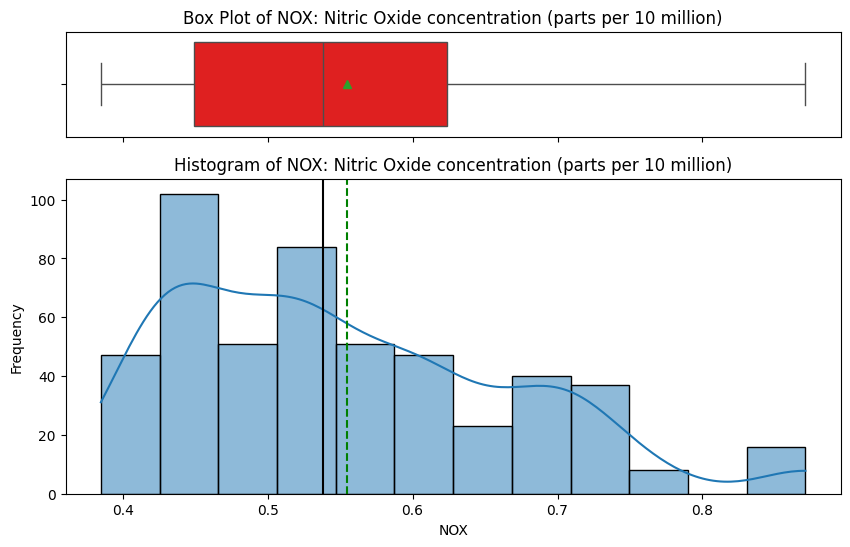

In [324]:
histogram_boxplot(df.NOX, 'NOX: Nitric Oxide concentration (parts per 10 million)')


air pollution serves as a quality indicator for each town of and an indirect marker of industrialization and urbanization. The values range between 0.385 (cleaner, less industrialized), and 0.871 (poor air quality) with a median of 0.538 and average of 0.55 and a standard deviation of 0.1159 indicating a slight right skewness indicating environmental inequality. we expect NOX to correlate with industrial activity and inversely with property values, public health and environmental quality.

The plot shows clustering of NOX values and confirms the a right skew meaning that most areas have low NOX values but other areas have very high values.


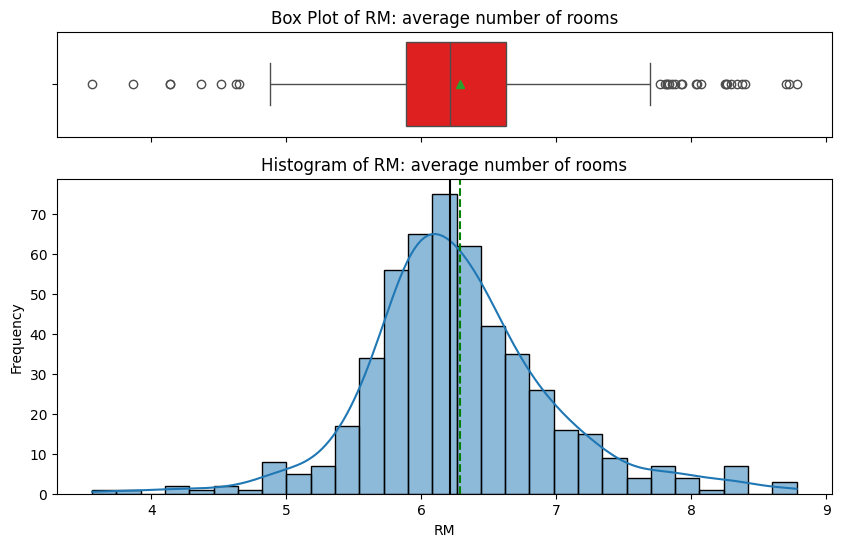

In [325]:
histogram_boxplot(df.RM, 'RM: average number of rooms')


The plot confirms the symmetrical distribution of room numbers.  

each record in this dataset represents 1 individual house, so it is suprising that there no single room dwellings, since Boston is a university town where one would expect single room studios or apartments. perhaps this changed after 1970 when this dataset was produced or smaller dwellings might not be included in the dataset.

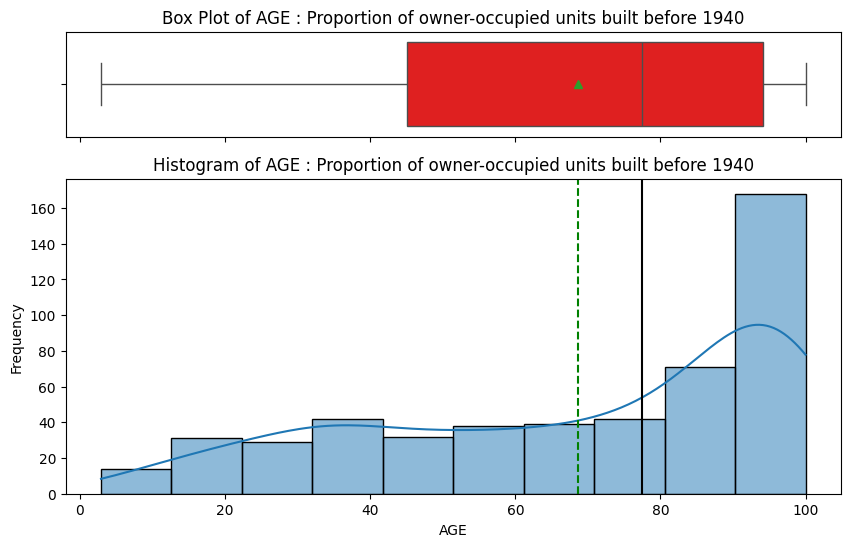

In [326]:
histogram_boxplot(df.AGE, 'AGE : Proportion of owner-occupied units built before 1940')


on average 68.87 % of houses are built before 1940, but in half the towns, 77.5 % are older than 1940. this left-skewedness means that some towns have an almost exclusively pre 1940 housing stock. there is high diversity in the housing age as the deviation is 28% with a min. of 2.9% and a max of 100%.

The plot confirms the left skew.

high AGE could correlate with MEDV value in both ways, as lack of modernization may influence value negatively while hostorical charm will influence it positively. so we will check this correlation.

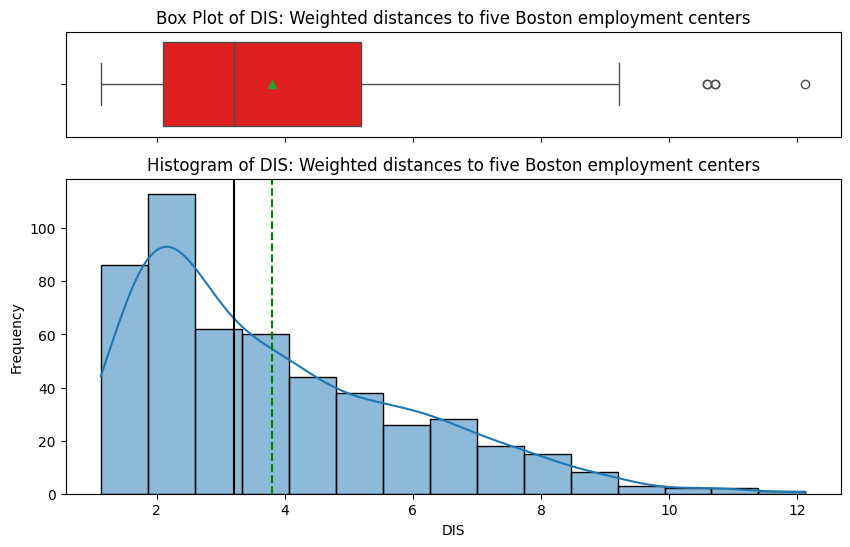

In [327]:
histogram_boxplot(df.DIS, 'DIS: Weighted distances to five Boston employment centers')


The plot confirms the right skew. most towns are relatively close to employment centers, and a few outliers are farther away.


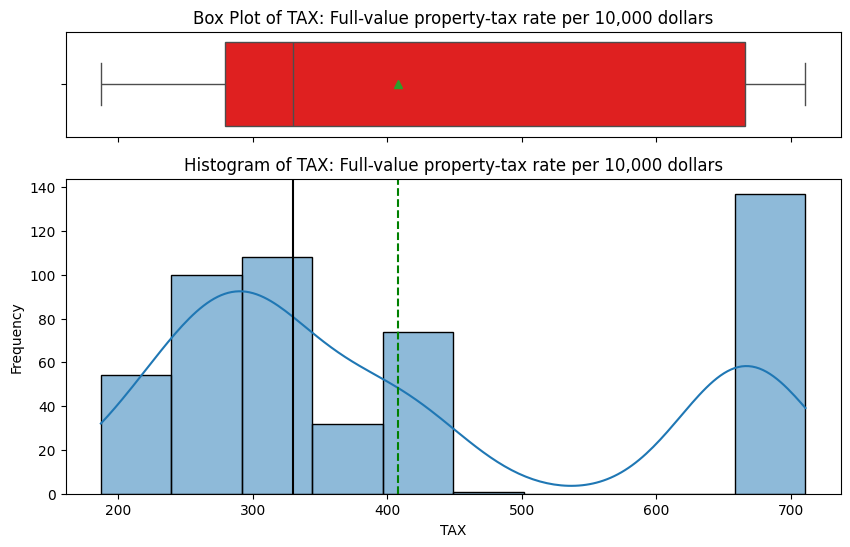

In [328]:
histogram_boxplot(df.TAX, 'TAX: Full-value property-tax rate per 10,000 dollars')


it is clear that there are 2 distict peaks, one around \$279-\$300 (2.79% to 3%) and a 2nd peak at $666 (~ 6.7%)

it means that public service funding is not equallly distributed.




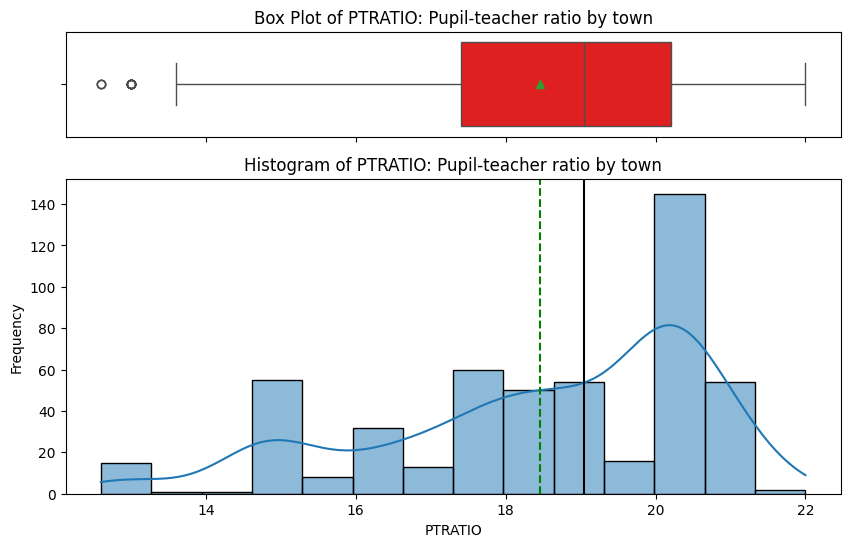

In [329]:
histogram_boxplot(df.PTRATIO, 'PTRATIO: Pupil-teacher ratio by town')


the mean of 18.46 < median 19.05 indicating right skew confirmed in the boxplot. the iqr spans from (Q1) 17.4 to 20.2 (Q3). ratios near 20 are the majority indicating some form of policy or standard.



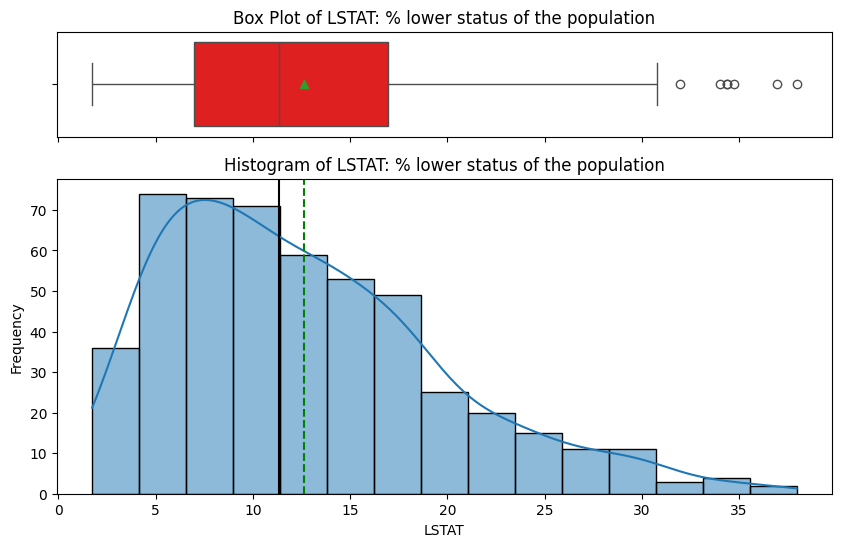

In [330]:
histogram_boxplot(df.LSTAT, 'LSTAT: % lower status of the population')


LSTAT shows a wide range between 1.73% and 37.97% and a mean of 12.65% with standard deviation of 7.14%. 25% of towns have a percentage of lower-status populations below 6.95% while 75% have a percentage less than 16.95%, meaning 25% of towns have percentages > 16.95% going towards 37.97% in a long tail which indicates concentration of socioeconomic disparities.

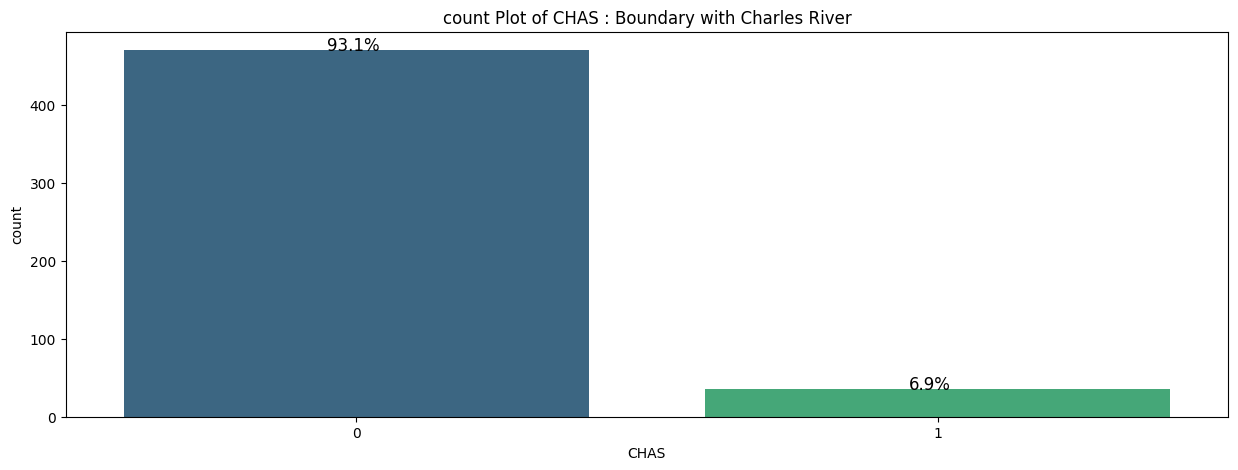

In [331]:
bar_perc(df, 'CHAS', 'CHAS : Boundary with Charles River')

the CHAS histogram confirms that only 6.9% of towns is bordering the river.

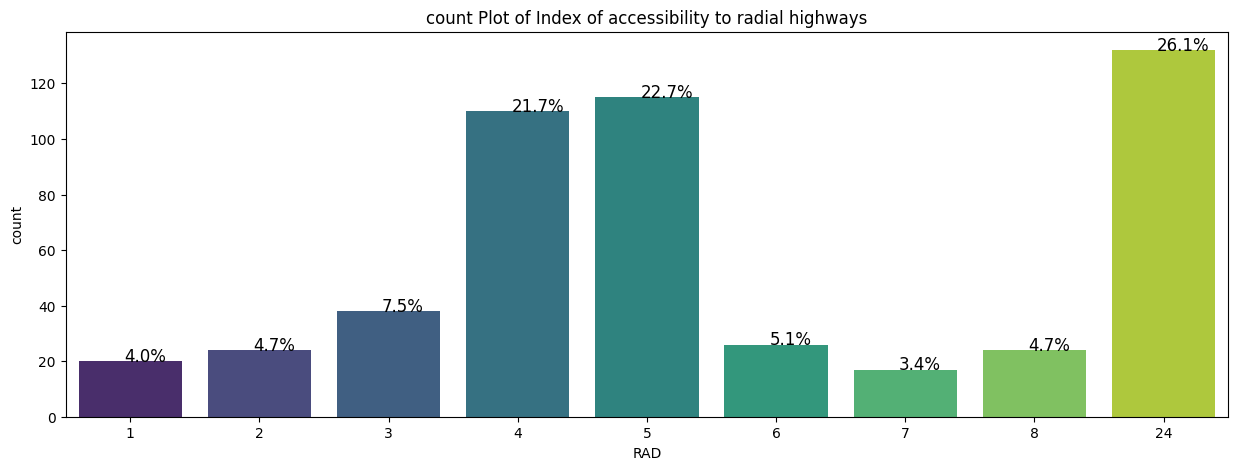

In [332]:
bar_perc(df, 'RAD', 'Index of accessibility to radial highways')

There is a clear divide between 2 clusters, the dominant cluster of 21.7% + 22.7 = 44.4% has an moderate accessability level of 4 & 5 whereas a smaller cluster of 26.1 has a very high RAD of 24, so towns in this area are very close to highways.

###Target Value###

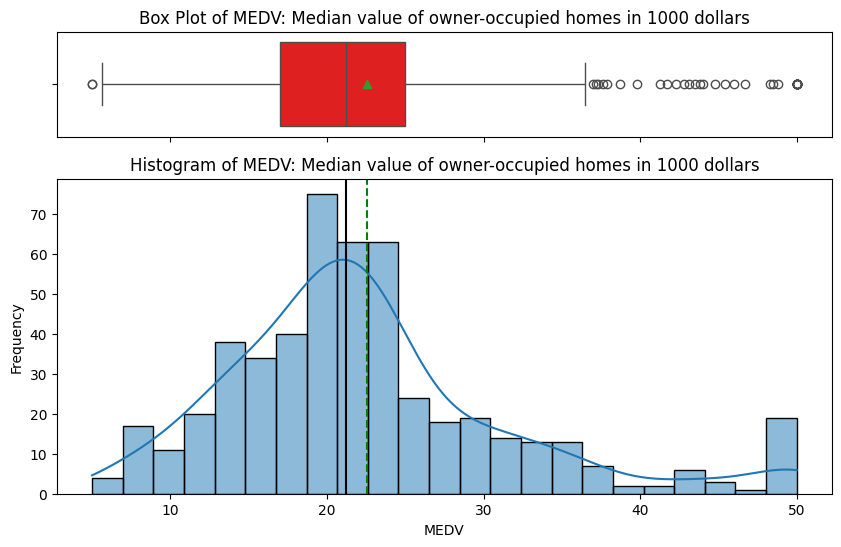

In [333]:
histogram_boxplot(df.MEDV, 'MEDV: Median value of owner-occupied homes in 1000 dollars')



house value has a wide range from $5000 to \$48800 with median of \$21200 and mean of \$22533. standard deviation is \$9197 indicating a large variability.
The \$50k max value indicates this dataset was capped to reduce outliers.

Answer to question : "What does the distribution of 'MEDV' look like?"

The histogram reveals a right-skewed distribution, as most towns are < \$25,000, the long tail to the right shows a smaller amount of homes tend towards \$50000.



## Multivariate Analysis##


###heatmap###

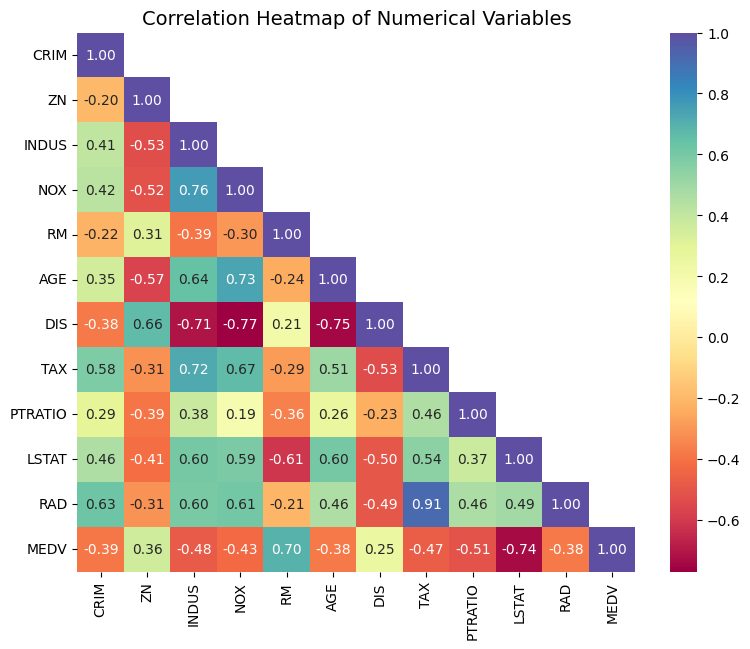

In [334]:

# Check for correlation among numerical variables
num_var = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'RAD', 'MEDV']
# Plot the heatmap
plt.figure(figsize = (9, 7))
corr = df[num_var].corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr,
        mask=mask,
        annot = True,
        fmt = ".2f",
        cmap = "Spectral",
        xticklabels = corr.columns,
        yticklabels = corr.columns)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=14)
plt.show()


observations :
high correllations

* INDUS is higly correllated with
  * NOX (0.76) positive correllation : A high positive correlation between INDUS (proportion of non-retail business acres per town) and NOX (nitric oxide concentration) suggests that industrial activity strongly contributes to air pollution.
  * DIS (-0.71) negative correllation : strong negative correlation between INDUS and DIS (distance to employment centers) indicates that industrial zones are typically closer to employment hubs.
  * TAX : (0.72) high positive correllation: towns with high industry activity have high tax rates.

* NOX is highly correllated with :
  * AGE 0.73 high correllation : old houses are more prevalent in areas with low air quality.
  * DIS : -0.77 high negative correllation : air pollution will decrease with distance from employment centres.

Average correllations

* CRIM has average correlation with
  * INDUS (0.41) towns with industrial activity tend to have higher crimerates.
  * NOX (0.42) towns with high pollution tend to have higher crimerates aswell.
  * RAD (0.63) accessibility to highways is a vector for crime.

House value impact

* MEDV has  correllation with
  high
  * LSTAT (-0.74) towns with higher % of low status population strongly correllate with lower house values.
  * RM (0.70) : houses with large number of rooms tend to have a higher value.
  
  medium
  * PTRATIO (-0.5) : poor access to teachers negatively impacts house value.
  * NOX (-0.43) pollution negatively impacts house value.
  * TAX (-0.47) there is a negative correllation between high taxes and house values.
  
  low
  * CRIM (-0.39) high crime rates correllate moderately with lower housing prices.   
  * RAD (0.38) positive correllation of highway accessibility and house values.
  * DIS (0.25) : distance from employment centers positively impacts housing values to some degree.   

Overall, house values are positively influenced by larger homes (RM), suburban location (DIS), and highway access (RAD); negative factors include socioeconomic issues (LSTAT), poor education (PTRATIO), pollution (NOX) and safety issues (CRIM).

*Action points*

* for city mayors :
 * Improve education
 * reduce pollution
 * invest in safety
* for house builders :
  * invest in low-crime areas
  * invest in low-pollution areas
  * invest in suburban areas with good infrastructure.


###bivariate scatter plots###

Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

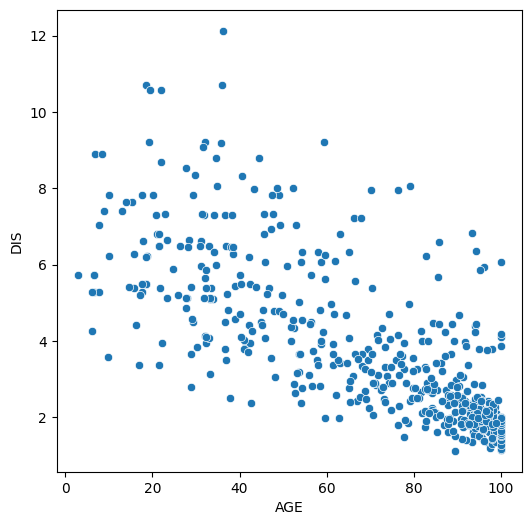

In [335]:
# Age vs Distance
plt.figure(figsize = [6, 6])
sns.scatterplot(x = df.AGE, y = df.DIS)
plt.show()

The proportion of the old houses is negatively correlated with distance to Boston employment centers. the higher the distance the less employment centers. possibly Boston employment centers are located in older established towns.

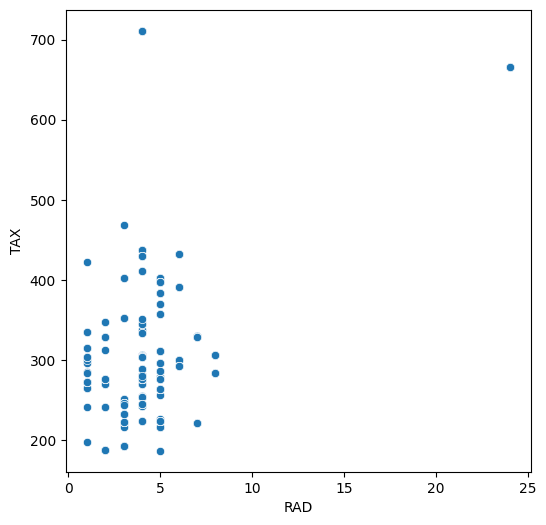

In [336]:
# RAD vs TAX
plt.figure(figsize = [6, 6])
sns.scatterplot(x = df.RAD, y = df.TAX)
plt.show()

There is a correllation between road distance and Tax is very high but it is quite irregular and due to outliers.
we will remove tax > 600 and check is there still is correllation.

In [337]:
# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df['TAX'], df['RAD'])[0])

df1 = df[df['TAX'] < 600]

# Calculate the correlation
print('After filtering the correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.9102281885331868
After filtering the correlation between TAX and RAD is 0.24975731331429196


the analysis suggests that while there might be a general trend of higher property taxes in areas with better highway access, this relationship is not as strong as it seemed before considering the influence of extreme tax values.

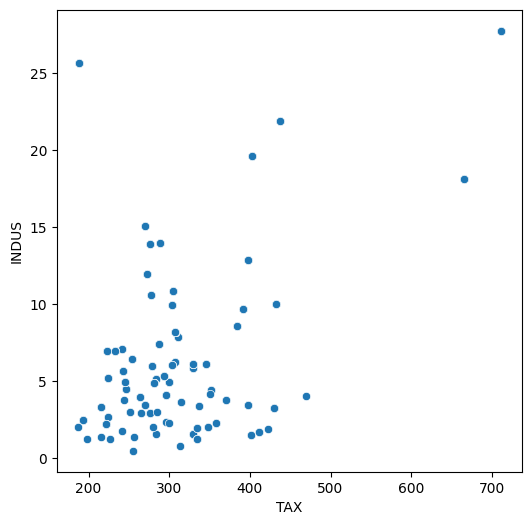

In [338]:
# TAX vs INDUS
plt.figure(figsize = [6, 6])
sns.scatterplot(x = df.TAX, y = df.INDUS)
plt.show()

there seems to be a positive correllation between tax and industralisation factor.

might be due to the reason that the variables TAX and INDUS are themselves related with a third variable.

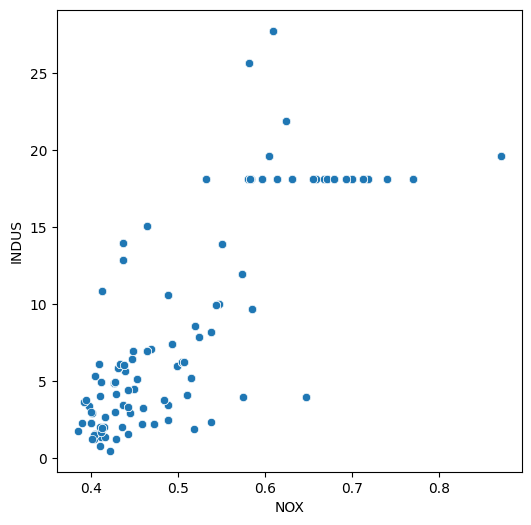

In [339]:
plt.figure(figsize = [6, 6])
sns.scatterplot(x = df.NOX, y = df.INDUS)
plt.show()

we see a positive correlation between pollution and towns industrial activity.

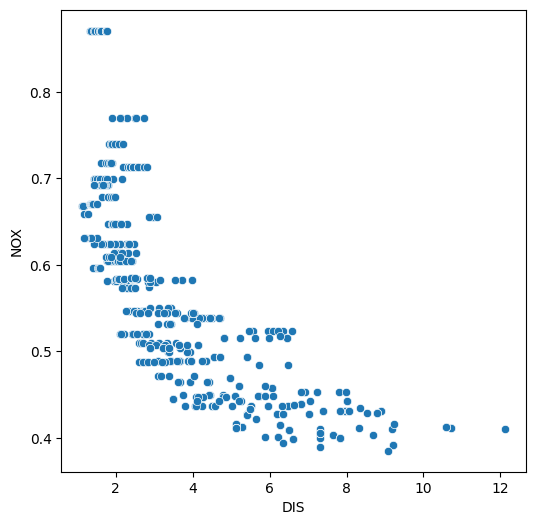

In [340]:
# Scatterplot to visualize the relationship between DIS and NOX

plt.figure(figsize = (6, 6))
sns.scatterplot(x = 'DIS', y = 'NOX', data = df)
plt.show()

there is a clear negative correllation between Distance from employment centers and pollution.

As pollution also correlates negatively with house value these are connected.

###Scatter plots for MEDV ###


Next, we are creating bivariate scatter plots to check relationships between independent and dependent variables.

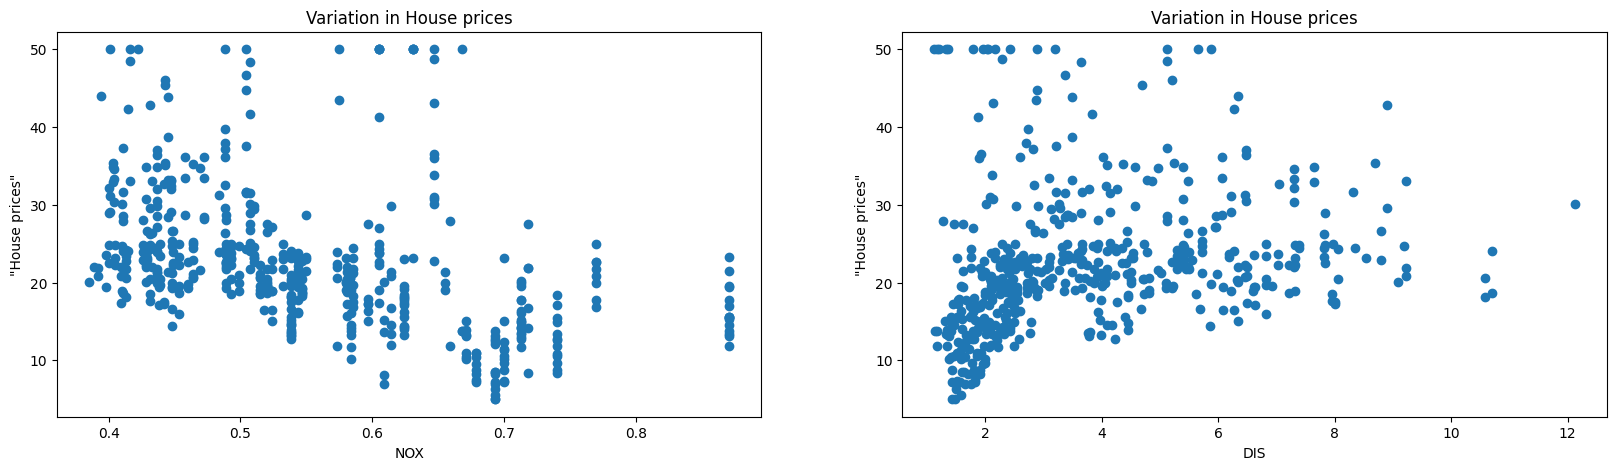

In [341]:
## Urbanization vs. Suburbanization

plt.figure(figsize=(20, 5))
features = ['NOX', 'DIS' ]
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices"')

the house price is negatively effected by NOX pollution.

the relation between distance from employment centres and house value very distributed but it tends to be positive.

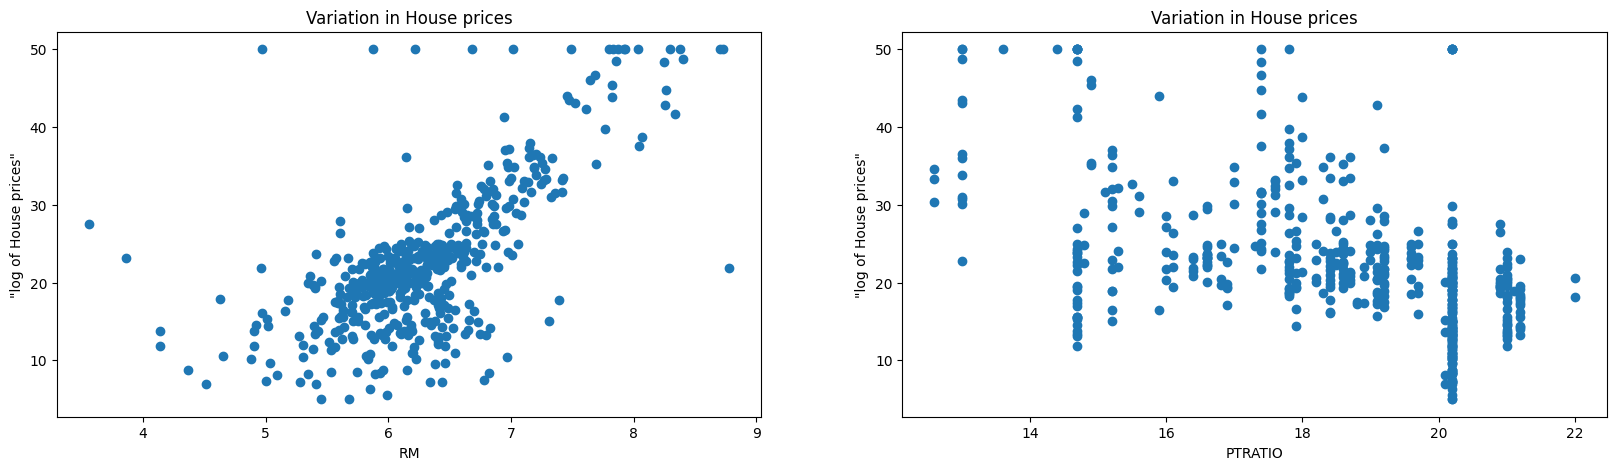

In [342]:
## Housing Quality (number of rooms) and Education
plt.figure(figsize=(20, 5))
features = ['RM', 'PTRATIO' ]
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"log of House prices"')

The house price seems to be highly effected by RM, the average number of rooms per dwelling

There are a few outliers in a horizontal line as the MEDV value is capped at 50.

Aswell there is a negative relation between class size and house prices.



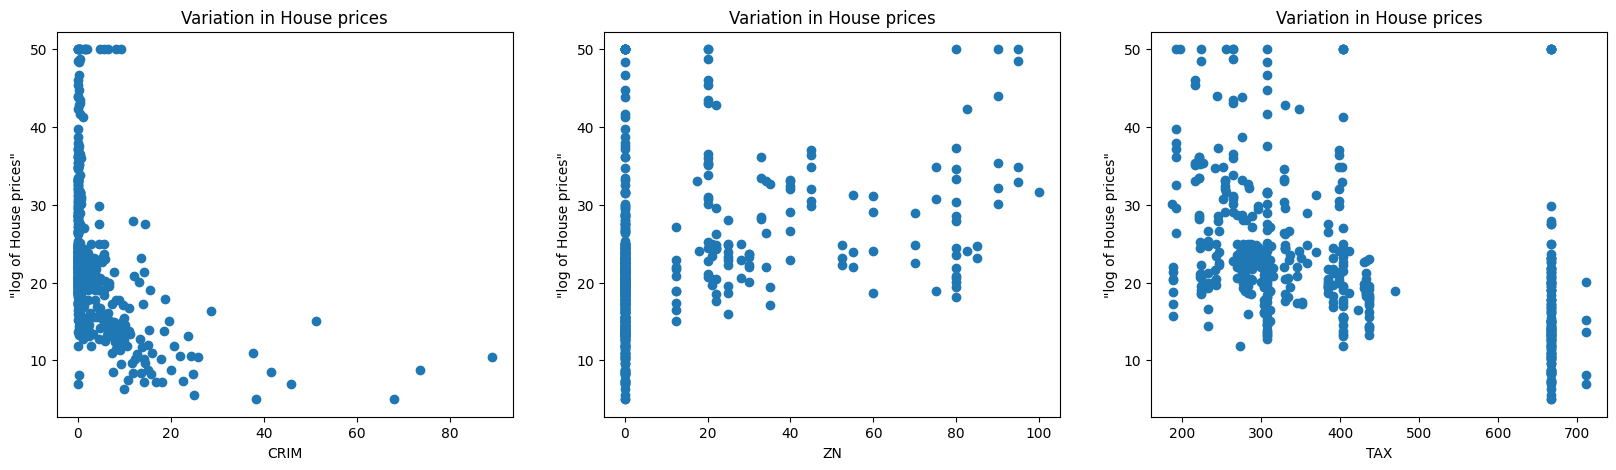

In [343]:
## socioeconomic (crime, zoning and tax)
plt.figure(figsize=(20, 5))
features = ['CRIM', 'ZN', 'TAX']
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"log of House prices"')

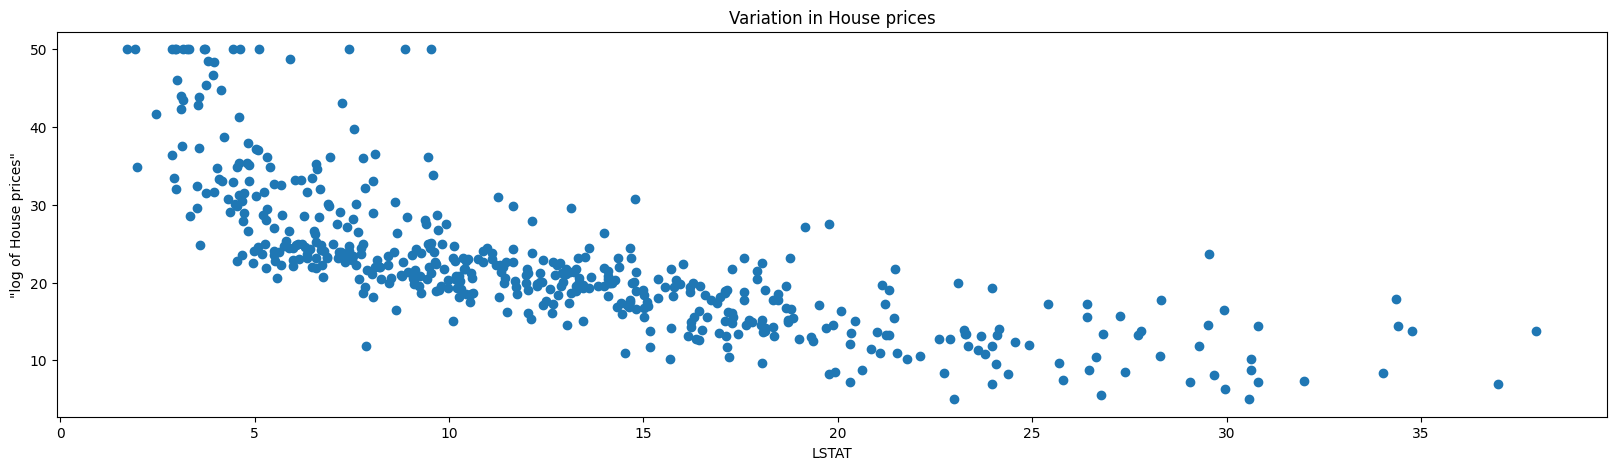

In [344]:
## socioeconomic LSTAT
plt.figure(figsize=(20, 5))
features = ['LSTAT']
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"log of House prices"')

LSTAT : towns with higher % of low status population strongly correllate with lower house values as the house price is lower in areas where lower status people live.

There are few outliers and the house price is capped at 50.

There is aswell a clear negative correlation between LSTAT and house values.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

Missing value treatment : we see no missing values in this dataset but there are capped values.

We will remove the capped datapoints.

In [345]:
capped_value = 50.000000
num_capped = (df['MEDV'] == capped_value).sum()
print(f"Number of capped values: {num_capped}")
# Remove rows where column 'MEDV' equals the cap value
df = df[df['MEDV'] != capped_value]

summary_stats = df['MEDV'].describe()
print("adapted Summary Statistics for MEDV:")
print(summary_stats)

Number of capped values: 16
adapted Summary Statistics for MEDV:
count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: MEDV, dtype: float64


###Feature engineering (if needed)###

The data are dollar amounts from 1970. we will scale to account for 35 years of market inflation.

In [346]:
df = df.rename(columns={"MEDV": "USD1970"})
## using inflation figures from US
## https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/#google_vignette
cpi_1970_average = 38.8
cpi_2024_latest = 315.664
inflation_factor = cpi_2024_latest / cpi_1970_average
df["USD_CURRENT"] = df["USD1970"] * inflation_factor

In [347]:
summary_stats = df[['USD1970','USD_CURRENT']].describe()
print("adapted Summary Statistics for USD1970 and USD_CURRENT :")
print(summary_stats)

adapted Summary Statistics for USD1970 and USD_CURRENT :
          USD1970  USD_CURRENT
count  490.000000   490.000000
mean    21.635918   176.022694
std      7.865301    63.989495
min      5.000000    40.678351
25%     16.700000   135.865691
50%     20.900000   170.035505
75%     24.675000   200.747660
max     48.800000   397.020701


In [348]:
print("Minimum price: ${:,.2f}".format(np.min(df['USD_CURRENT'])* 1000) )
print("Maximum price: ${:,.2f}".format(np.max(df['USD_CURRENT'])* 1000))
print("Mean price: ${:,.2f}".format(np.mean(df['USD_CURRENT'])* 1000))
print("Median price ${:,.2f}".format(np.median(df['USD_CURRENT'])* 1000))
print("Standard deviation of prices: ${:,.2f}".format(np.std(df['USD_CURRENT'])* 1000))

Minimum price: $40,678.35
Maximum price: $397,020.70
Mean price: $176,022.69
Median price $170,035.51
Standard deviation of prices: $63,924.17


In [349]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,USD1970,USD_CURRENT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,195.256082
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,175.730474
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,282.307753
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,271.731381
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,294.511258


###Log transformation of dependent variable if skewed###

as USD_CURRENT is the target variable we need to reduce the impact of its right skewedness. to do this we need to do a transformation. we can do this using a log transformation.

the logarithmic price scale makes the data more normally distributed and reduces the size of the outliers.

In [350]:
from scipy.stats import skew
df['USD_CURRENT_log'] = np.log(df['USD_CURRENT'])
skewness_value_before = skew(df['USD_CURRENT'])
print(skewness_value_before)

skewness_value_after = skew(df['USD_CURRENT_log'])
print(skewness_value_after)

0.7732836030909053
-0.5834874794069332


After applying the skewness correction using log transformation, it goes from 0.77 to -0.58, closer to 0 but now slightly leftskewed.

In [351]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,USD1970,USD_CURRENT,USD_CURRENT_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,195.256082,5.274312
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,175.730474,5.168951
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,282.307753,5.642998
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,271.731381,5.604814
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,294.511258,5.685317


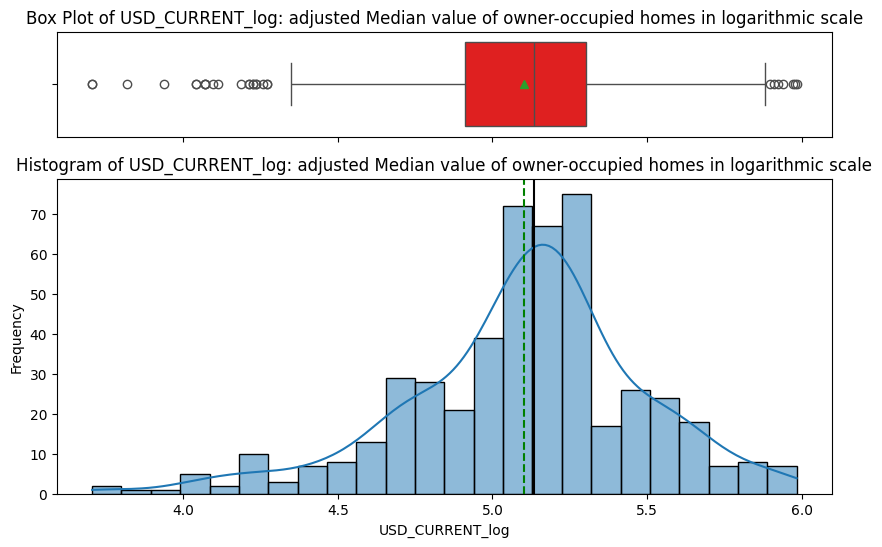

In [352]:
## applying a log transformation
histogram_boxplot(df['USD_CURRENT_log'], 'USD_CURRENT_log: adjusted Median value of owner-occupied homes in logarithmic scale')

this shows that the distribution is now near normal but the skewness is reversed.



###Model Building###

Splitting dataset

In [353]:
# Separate the dependent vs independent variables
Y = df['USD_CURRENT_log']
X = df.drop(columns = {'USD1970', 'USD_CURRENT', 'USD_CURRENT_log'})
# Add the intercept term
X = sm.add_constant(X)

In [354]:
## split into training and test sets
# Using train_test_split to divide data into training and testing sets
# X: Feature data
# Y: Target variable data (log-transformed house prices)
# test_size = 0.3: 30% of the data will be used for testing, leaving the remaining 70% for training.
# random_state = 5: Ensures reproducibility of the split
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X, Y, test_size = 0.30, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(343, 13)
(147, 13)
(343,)
(147,)


###multicollinearity check in training dataset.###

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train_1))

    feature         VIF
0     const  510.279075
1      CRIM    1.647801
2        ZN    2.447326
3     INDUS    3.826868
4      CHAS    1.075508
5       NOX    4.412298
6        RM    1.815469
7       AGE    2.927609
8       DIS    3.971879
9       RAD    8.611179
10      TAX   10.798743
11  PTRATIO    1.723164
12    LSTAT    2.947408


There are 2 variables with a high VIF

- RAD 8.611179
- TAX 10.798743

Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [357]:
# Create the model after dropping TAX
X_train_1 = X_train_1.drop(columns=['TAX'])  ## Complete the code

# Check for VIF
print(checking_vif(X_train_1))

    feature         VIF
0     const  507.367330
1      CRIM    1.647447
2        ZN    2.236175
3     INDUS    3.192485
4      CHAS    1.049382
5       NOX    4.357247
6        RM    1.809183
7       AGE    2.927008
8       DIS    3.971386
9       RAD    2.884874
10  PTRATIO    1.693683
11    LSTAT    2.944761


the VIF values are now < 5 all around for independent variables.

We can assume multicollinearity is now removed from this model.

## Model Building - Linear Regression

In [360]:
# Create the model using ordinary least squares.
model1 = sm.OLS(Y_train_1, X_train_1)
model1 = model1.fit()
# Get the model summary
model1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        USD_CURRENT_log   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     94.57
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           3.95e-95
Time:                        17:57:09   Log-Likelihood:                 89.832
No. Observations:                 343   AIC:                            -155.7
Df Residuals:                     331   BIC:                            -109.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4294      0.231     27.887      0.000       5.976       6.883
CRIM          -0.0102      0.001     -7.286      0.000      -0.013      -0.007
ZN            -0.0001      0.001     -0.193      0.847      -0.001       0.001
INDUS         -0.0064      0.003     -2.307      0.022      -0.012      -0.001
CHAS           0.0695      0.039      1.785      0.075      -0.007       0.146
NOX           -0.7284      0.190     -3.834      0.000      -1.102      -0.355
RM             0.0729      0.020      3.577      0.000       0.033       0.113
AGE           -0.0007      0.001     -1.203      0.230      -0.002       0.000
DIS           -0.0440      0.010     -4.427      0.000      -0.064      -0.024
RAD            0.0035      0.002      1.729      0.085      -0.000       0.007
PTRATIO       -0.0412      0.006     -6.456      0.000      -0.054      -0.029
LSTAT         -0.0243      0.002     -9.799      0.000      -0.029      -0.019
==============================================================================
Omnibus:                       16.959   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.996
Skew:                          -0.026   Prob(JB):                     1.70e-10
Kurtosis:                       4.774   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

interpretation:
Rsquared is 0.759 so the 75.9% of variance is explained by  the model. it is good that r squared is not close to 100% as it would mean overfitting.

F-statistic: 94.57 and Prob (F-statistic):	3.95e-95, indicating that the overall model is statistically significant.

Several predictors, such as CRIM, NOX, RM, DIS, PTRATIO, and LSTAT, have statistically significant impacts on USD_CURRENT_log.




### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [370]:
# Create the model after dropping columns 'USD1970', 'USD_CURRENT', 'USD_CURRENT_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['USD_CURRENT_log']
X = df.drop(columns=['USD1970', 'USD_CURRENT', 'USD_CURRENT_log', 'ZN', 'AGE', 'INDUS'])
X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train_2, X_train_2).fit()  ## Complete the code

# Get the model summary
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:        USD_CURRENT_log   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     132.2
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.82e-104
Time:                        19:24:11   Log-Likelihood:                 88.154
No. Observations:                 343   AIC:                            -156.3
Df Residuals:                     333   BIC:                            -117.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5275      0.240     27.151      0.0

In [364]:
print(checking_vif(X_train_2))



   feature         VIF
0    const  549.644874
1     CRIM    1.892598
2     CHAS    1.065235
3      NOX    3.787651
4       RM    1.772103
5      DIS    2.584837
6      RAD    6.549458
7      TAX    6.690950
8  PTRATIO    1.522835
9    LSTAT    2.572684


Now, we will check the linear regression assumptions.
* Mean of residuals should be 0
* No Heteroscedasticity
* Linearity of variables
* Normality of error terms


#### **1. Check for residuals**

In [365]:
# the residuals are the difference between predicted and actual values in
# training dataset
residuals = model2.predict(X_train_2) - y_train_2
np.mean(residuals)


-4.0870449234218446e-14

The mean of the residuals should is close to zero in this model indicating a well-fitted regression.

#### **2. Check for homoscedasticity**



* Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

* We'll use Goldfeldquandt Test to test the following hypothesis with alpha = 0.05:
  * Null hypothesis: Residuals are homoscedastic
  * Alternate hypothesis: Residuals have heteroscedastic

In [366]:
# Heteroscedasticity check
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train_2)
lzip(name, test)

[('F statistic', 1.8005646167379865), ('p-value', 0.00010527854969563857)]

p value is < 0.05 so we have to reject null hypothesis and adjust the model.



In [367]:
# Fit the model with robust standard errors
model2_robust = sm.OLS(y_train_2, X_train_2).fit(cov_type='HC3')

# Display the summary
print(model2_robust.summary())

                            OLS Regression Results                            
Dep. Variable:        USD_CURRENT_log   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     90.74
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           4.10e-84
Time:                        19:04:41   Log-Likelihood:                 88.154
No. Observations:                 343   AIC:                            -156.3
Df Residuals:                     333   BIC:                            -117.9
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5275      0.321     20.336      0.0

1) r-squared increased to 78.1%
2)



In [372]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

# Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, X_train_2)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# White Test
white_test = het_white(residuals, X_train_2)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 63.412898071139175, 'LM-Test p-value': 2.934028753631445e-10, 'F-Statistic': 8.391936582357602, 'F-Test p-value': 2.649509351520507e-11}
{'LM Statistic': 130.239654674756, 'LM-Test p-value': 1.9132236532748388e-08, 'F-Statistic': 3.337909231572427, 'F-Test p-value': 3.8880333961256946e-11}


there is still heteroscedasticity after applying the adjustment as the P value still < 0.05

#### **3. Check for Linearity**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

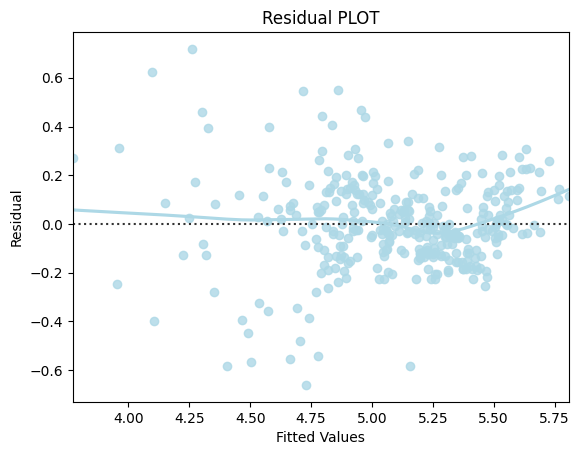

In [373]:
# Linearity of variables check

# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)  ## Complete the code

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()




The variance seems mostly constant and there don't seem to be many outliers.

#### **4. Normality of error terms**

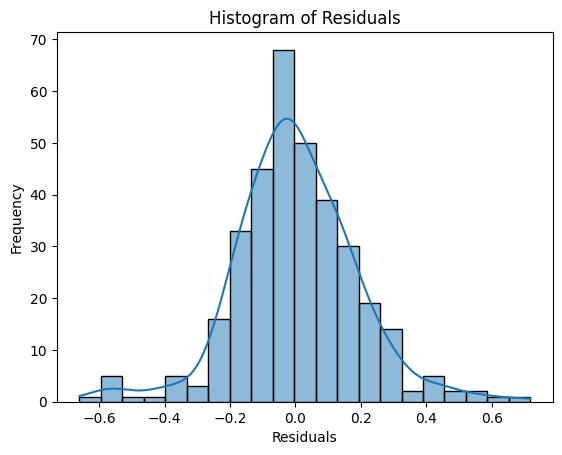

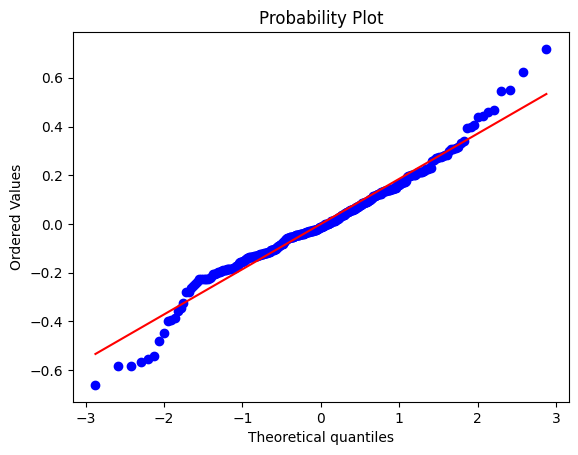

In [374]:
# Normality of error terms check

# Plot histogram of residuals
sns.histplot(model2.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

import pylab
import scipy.stats as stats
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

the histogram resembles a bell curve and the points largely fall along the line. it indicates that the model largely fits the data.

## Performance check of the model

In [377]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train_2

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test_2

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train_2, X_test_2)

    Data      RMSE       MAE      MAPE
0  Train  0.187131  0.138457  2.804227
1   Test  0.152217  0.118602  2.360827



* rmse & mae for both datasets is low.

* test metrics are slightly better. would mean theat the model is generalising well to unseen data

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [380]:
# Import the required function
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train_2, y_train_2, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train_2, y_train_2, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.744 (+/- 0.213)
Mean Squared Error: 0.039 (+/- 0.034)


###Model 1 :  RM vs USD_CURRENT_log ###


In [205]:
## train the model
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)
y_train_predict_1 = reg_1.predict(X_train_1)


1. How does the model perform ? Check using Rsquared, RSME, MAE, MAPE


In [206]:
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)
mae = mean_absolute_error(Y_train_1, y_train_predict_1)
mape = mean_absolute_percentage_error(Y_train_1, y_train_predict_1)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.3110697876514573
R2 score is 0.33
MAE is 0.2232548636864871
MAPE is 0.045786686267967246




2. Is there multicollinearity? Check using VIF


In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
# Check for correlation among numerical variables
num_var = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'RAD']
vif_data = pd.DataFrame()
vif_data["feature"] = df[num_var].columns
vif_data["VIF"] = [variance_inflation_factor(df[num_var].values, i) for i in range(len(df[num_var].columns))]

# Print VIF data
print(vif_data)

    feature        VIF
0      CRIM   2.069294
1        ZN   2.836978
2     INDUS  14.471883
3       NOX  72.128342
4        RM  84.085835
5       AGE  21.212085
6       DIS  14.924059
7       TAX  58.926415
8   PTRATIO  83.425081
9     LSTAT  12.142150
10      RAD  14.267418


the VIF values are high.

###Model 2###

we can try to remove non essential features in order to reduce the VIF.

In [208]:
# Select the desired features
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'USD_CURRENT_log']
df_selected = df[selected_features]

# Calculate VIF for the selected features
vif_data_selected = pd.DataFrame()
vif_data_selected["feature"] = df_selected.columns
vif_data_selected["VIF"] = [variance_inflation_factor(df_selected.values, i)
                           for i in range(len(df_selected.columns))]

# Print VIF data for selected features
print(vif_data_selected)

           feature         VIF
0               RM  148.419354
1            LSTAT    6.172027
2          PTRATIO   66.934858
3  USD_CURRENT_log  168.877742


In [209]:
X_rooms1 = df_selected.RM
y_price1 = df_selected['USD_CURRENT_log']

# convert into numpy array aith 1 column and #rows from original array.
X_rooms1 = np.array(X_rooms1).reshape(-1,1)
y_price1 = np.array(y_price1).reshape(-1,1)

print(X_rooms1.shape)
print(y_price1.shape)




(490, 1)
(490, 1)


In [210]:
## split into training and test sets
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_rooms1, y_price1, test_size = 0.2, random_state=5)
print(X_train_2.shape)
print(X_test_2.shape)
print(Y_train_2.shape)
print(Y_test_2.shape)



(392, 1)
(98, 1)
(392, 1)
(98, 1)


In [211]:
## train the model2
reg_2 = LinearRegression()
reg_2.fit(X_train_2, Y_train_2)
y_train_predict_2 = reg_2.predict(X_train_2)

In [212]:
rmse_2 = (np.sqrt(mean_squared_error(Y_train_2, y_train_predict_2)))
r2_2 = round(reg_1.score(X_train_2, Y_train_2),2)
mae_2 = mean_absolute_error(Y_train_2, y_train_predict_2)
mape_2 = mean_absolute_percentage_error(Y_train_2, y_train_predict_2)

print("The model performance for training set 2")
print("----------------------------------------")
print('RMSE is {}'.format(rmse_2))
print('R2 score is {}'.format(r2_2))
print('MAE is {}'.format(mae_2))
print('MAPE is {}'.format(mape_2))

print("\n")

The model performance for training set 2
----------------------------------------
RMSE is 0.3110697876514573
R2 score is 0.33
MAE is 0.2232548636864871
MAPE is 0.045786686267967246




compare these results to model 1

RMSE is 0.3110697876514573
R2 score is 0.33
MAE is 0.2232548636864871
MAPE is 0.045786686267967246

Model 2 is much worse than model 1 due to higher RMSE and MAE values.
removing the other features led to a loss of predictive power. there is also the concern for oversimplicifation.


###Model 3###

we can try PCA. this will create "buckets" with same characteristics so that they "move together" and have predictability, without inter correllation leading to a low VIF ratio.


3. How does the model is performing after cross validation?

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

## Actionable Insights and Recommendations

-


___